In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
import numpy as np

In [2]:
from google.colab import files
u = files.upload()

Saving googleplaystore.csv to googleplaystore.csv


In [195]:
import pandas as pd
data = pd.read_csv("googleplaystore.csv")

In [196]:
for i in data.columns:
  print(f"Column {i}: {data[i].unique()}")
  print("#"*100)

Column App: ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
####################################################################################################
Column Category: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
####################################################################################################
Column Rating: [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.

In [197]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [198]:
data.drop("App",axis=1,inplace=True)

In [199]:
data["Type"] = data["Type"].str.replace("Free","0")
data["Type"] = data["Type"].str.replace("Paid","1")
mod = data["Type"]
data["Type"] = data["Type"].str.replace("nan",str(mod))
data.dropna(subset=["Type"],inplace=True)
data["Type"] = pd.to_numeric(data["Type"],downcast="integer")

In [200]:
data.replace("Free",0,inplace=True)
data["Installs"] = data["Installs"].str.rstrip("+").str.replace(",","")
data["Installs"] = pd.to_numeric(data["Installs"], downcast="float")
data["Installs"].fillna(0,inplace=True)
data["Size"] = data["Size"].str.rstrip("+")
data["Size"] = data["Size"].str.rstrip("k")
data["Size"] = data["Size"].str.rstrip("M")
data["Size"] = data["Size"].str.replace("Varies with device","0").str.replace(",","")
data["Size"] = pd.to_numeric(data["Size"],downcast="float")
data["Reviews"] = pd.to_numeric(data["Size"],downcast="float")
data["Price"] = data["Price"].str.strip("$").str.replace("Everyone","0")
data["Price"] = pd.to_numeric(data["Price"],downcast='float')
android = data["Android Ver"].value_counts().to_dict()
android = sorted(android.keys())

In [201]:
mean = data["Rating"].mean()
data["Rating"].replace(np.nan,mean,inplace=True)
encoder = OrdinalEncoder(categories=[android])
encoder

OrdinalEncoder(categories=[['1.0 and up', '1.5 and up', '1.6 and up',
                            '2.0 and up', '2.0.1 and up', '2.1 and up',
                            '2.2 - 7.1.1', '2.2 and up', '2.3 and up',
                            '2.3.3 and up', '3.0 and up', '3.1 and up',
                            '3.2 and up', '4.0 and up', '4.0.3 - 7.1.1',
                            '4.0.3 and up', '4.1 - 7.1.1', '4.1 and up',
                            '4.2 and up', '4.3 and up', '4.4 and up',
                            '4.4W and up', '5.0 - 6.0', '5.0 - 7.1.1',
                            '5.0 - 8.0', '5.0 and up', '5.1 and up',
                            '6.0 and up', '7.0 - 7.1.1', '7.0 and up', ...]])

In [202]:
data.dropna(subset=["Android Ver"], inplace=True)

In [203]:
dataset = pd.DataFrame(data['Android Ver'])
dataset = pd.DataFrame(encoder.fit_transform(dataset))

In [204]:
dataset.columns = ["Android Ver"]
data.drop("Android Ver",axis=1,inplace=True)

In [205]:
data = pd.concat([data,dataset],axis=1)

In [206]:
list1 = []
last = data["Last Updated"].value_counts().to_dict()
for i in last.keys():
   for j in i.split(", "):
    if j.startswith("2"):
      list1.append(j)
list1 = pd.DataFrame(list1)
list1.columns = ["Last Updated"]
data.drop("Last Updated",axis=1,inplace=True)
data = pd.concat([data,list1],axis=1)
data["Last Updated"].replace(np.nan,"2017",inplace=True)

In [207]:
data.dropna(subset=["Last Updated"],inplace=True)

In [208]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated
0,ART_AND_DESIGN,4.1,19.0,19.0,10000.0,0.0,0.0,Everyone,Art & Design,1.0.0,15.0,2018
1,ART_AND_DESIGN,3.9,14.0,14.0,500000.0,0.0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,15.0,2018
2,ART_AND_DESIGN,4.7,8.7,8.7,5000000.0,0.0,0.0,Everyone,Art & Design,1.2.4,15.0,2018
3,ART_AND_DESIGN,4.5,25.0,25.0,50000000.0,0.0,0.0,Teen,Art & Design,Varies with device,18.0,2018
4,ART_AND_DESIGN,4.3,2.8,2.8,100000.0,0.0,0.0,Everyone,Art & Design;Creativity,1.1,20.0,2018


In [209]:
update_encoder = OrdinalEncoder(categories=[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']],handle_unknown="use_encoded_value",unknown_value=np.nan)
update_set = data["Last Updated"]

In [210]:
update_set = pd.DataFrame(update_set)
update_set = update_encoder.fit_transform(update_set)

In [211]:
update_set = pd.DataFrame(update_set)
update_set.columns = ["Last Updated"]
data.drop("Last Updated",axis=1,inplace=True)
data = pd.concat([data,update_set],axis=1)

In [212]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Last Updated
0,ART_AND_DESIGN,4.1,19.0,19.0,10000.0,0.0,0.0,Everyone,Art & Design,1.0.0,15.0,8.0
1,ART_AND_DESIGN,3.9,14.0,14.0,500000.0,0.0,0.0,Everyone,Art & Design;Pretend Play,2.0.0,15.0,8.0
2,ART_AND_DESIGN,4.7,8.7,8.7,5000000.0,0.0,0.0,Everyone,Art & Design,1.2.4,15.0,8.0
3,ART_AND_DESIGN,4.5,25.0,25.0,50000000.0,0.0,0.0,Teen,Art & Design,Varies with device,18.0,8.0
4,ART_AND_DESIGN,4.3,2.8,2.8,100000.0,0.0,0.0,Everyone,Art & Design;Creativity,1.1,20.0,8.0


In [213]:
data["Content Rating"].value_counts()

Everyone           8712
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [214]:
data["Content Rating"] = data["Content Rating"].str.replace("Unrated","Everyone")

In [215]:
cont_encoder = OrdinalEncoder(categories=[['Everyone','Everyone 10+','Teen','Mature 17+','Adults only 18+']],handle_unknown="use_encoded_value",unknown_value=np.nan)
cont_data = data["Content Rating"]
update_encoder

OrdinalEncoder(categories=[['2010', '2011', '2012', '2013', '2014', '2015',
                            '2016', '2017', '2018']],
               handle_unknown='use_encoded_value', unknown_value=nan)

In [216]:
cont_data = np.array(cont_data)
cont_data.reshape(-1,1)
cont_data = pd.DataFrame(cont_data)

In [217]:
cont_data = cont_encoder.fit_transform(cont_data)

In [218]:
cont_data = pd.DataFrame(cont_data)
cont_data.columns = ["Content Rating"]
data.drop("Content Rating",axis=1,inplace=True)
data = pd.concat([data,cont_data],axis=1)

In [219]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Current Ver,Android Ver,Last Updated,Content Rating
0,ART_AND_DESIGN,4.1,19.0,19.0,10000.0,0.0,0.0,Art & Design,1.0.0,15.0,8.0,0.0
1,ART_AND_DESIGN,3.9,14.0,14.0,500000.0,0.0,0.0,Art & Design;Pretend Play,2.0.0,15.0,8.0,0.0
2,ART_AND_DESIGN,4.7,8.7,8.7,5000000.0,0.0,0.0,Art & Design,1.2.4,15.0,8.0,0.0
3,ART_AND_DESIGN,4.5,25.0,25.0,50000000.0,0.0,0.0,Art & Design,Varies with device,18.0,8.0,2.0
4,ART_AND_DESIGN,4.3,2.8,2.8,100000.0,0.0,0.0,Art & Design;Creativity,1.1,20.0,8.0,0.0


In [220]:
ohe = OneHotEncoder(handle_unknown="ignore",sparse_output=False).set_output(transform="pandas")
encoded_data = ohe.fit_transform(data[["Category","Genres","Current Ver"]])
data = pd.concat([data,encoded_data],axis=1).drop(["Category","Genres","Current Ver"],axis=1)

In [221]:
data.dropna(inplace=True)

In [222]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
x = data.drop("Type",axis=1)
y = data["Type"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [223]:
from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
nx_train = scl.fit_transform(x_train)
nx_test = scl.fit_transform(x_test)

In [224]:
log = LogisticRegression(max_iter=150)
log.fit(nx_train,y_train)
log_pred = log.predict(nx_test)

In [225]:
print(f"LogisticRegression model accuracy: {accuracy_score(y_test,log_pred):0.1%}") #GOOOOD MOOODEL (≧∀≦)ゞ

LogisticRegression model accuracy: 92.0%


In [226]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(nx_train,y_train)
knn_pred = knn.predict(nx_test)

In [227]:
print(f"KNN model accuracy: {accuracy_score(y_test,knn_pred):0.1%}") #WE GOoOoD !!  ^_~

KNN model accuracy: 92.0%


In [228]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="gini",max_depth=25)
tree.fit(nx_train,y_train)
tree_pred = tree.predict(nx_test)

In [229]:
print(f"Decision Tree model accuracy: {accuracy_score(y_test,tree_pred):0.1%}") #That's not good we don't need the accuracy to reach 100% that's too bad !!
#I tried to minimize the training data but same thing happend I guess the reason behind that is the OneHotEncoder maybe I'll fix it later

Decision Tree model accuracy: 100.0%


In [230]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion="entropy",n_estimators=40,max_depth=10)
forest.fit(nx_train,y_train)
forest_pred = forest.predict(nx_test)

In [232]:
print(f"RandomForest model accuracy: {accuracy_score(y_test,forest_pred):0.1%}") # THE BEST MODEL SO FAR !! (●'◡'●) until I tried the grid parameters and ruined it

RandomForest model accuracy: 92.0%


In [146]:
from sklearn.model_selection import GridSearchCV
grid_log = GridSearchCV(LogisticRegression(),{"max_iter":[50,100,150,200,300,500,1000]},cv=10)
grid_log.fit(nx_train,y_train)
grid_log.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'max_iter': 50}

In [147]:
grid_log.best_score_

0.9276499623079772

In [154]:
grid_knn = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[3,5,7,9,11,13,15,17]})
grid_knn.fit(nx_train,y_train)
grid_knn.best_params_

{'n_neighbors': 7}

In [155]:
grid_knn.best_score_

0.9260326879470433

In [162]:
grid_tree = GridSearchCV(DecisionTreeClassifier(),{"criterion":["gini","entropy"],"max_depth":[5,10,20,35,50]},cv=5)
grid_tree.fit(nx_train,y_train)
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [163]:
grid_tree.best_score_

1.0

In [184]:
grid_forest = GridSearchCV(RandomForestClassifier(),{"criterion":["entropy"],"n_estimators":[13],"max_depth":[40]},cv=5)
grid_forest.fit(nx_train,y_train)
grid_forest.best_params_

{'criterion': 'entropy', 'max_depth': 40, 'n_estimators': 13}

In [185]:
grid_forest.best_score_

0.9724238291766248

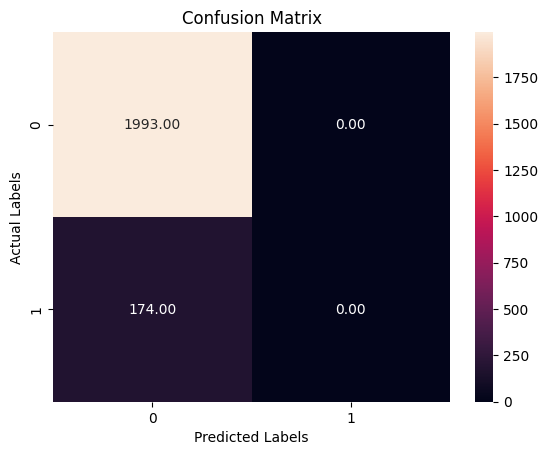

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test,forest_pred)
plt.title("Confusion Matrix")
a = sns.heatmap(conf,annot=True,fmt="0.2f")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

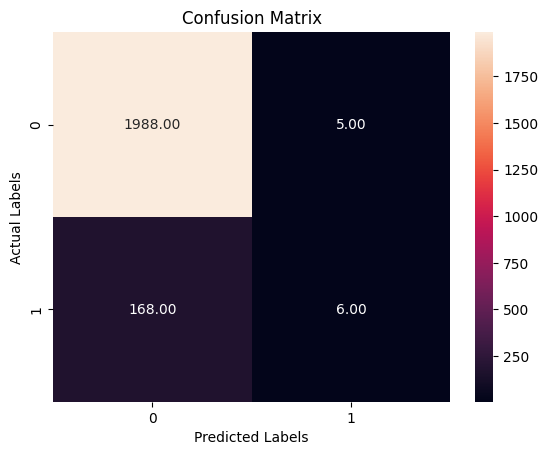

In [237]:
confl = confusion_matrix(y_test,log_pred)
plt.title("Confusion Matrix")
a = sns.heatmap(confl,annot=True,fmt="0.2f")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

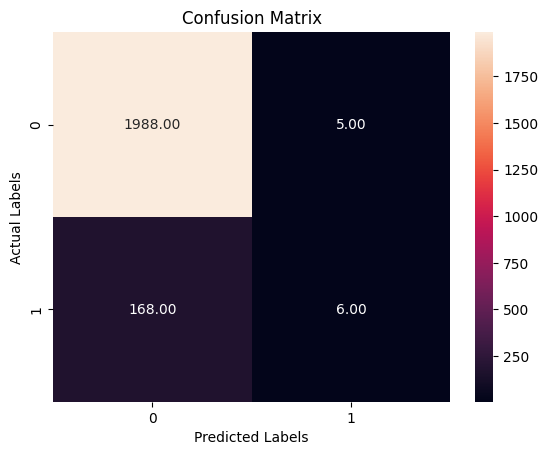

In [238]:
confk = confusion_matrix(y_test,knn_pred)
plt.title("Confusion Matrix")
a = sns.heatmap(confk,annot=True,fmt="0.2f")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

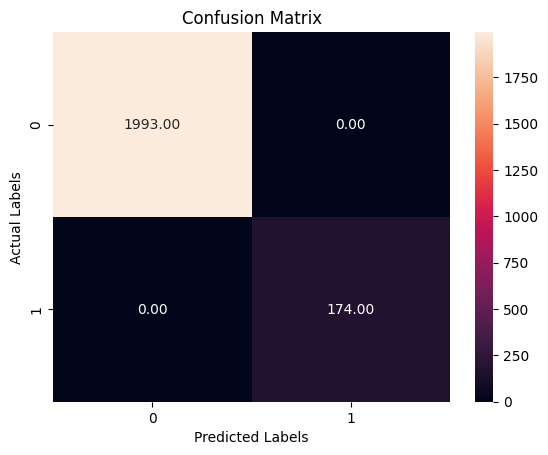

In [239]:
conft = confusion_matrix(y_test,tree_pred)
plt.title("Confusion Matrix")
a = sns.heatmap(conft,annot=True,fmt="0.2f")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

In [ ]:
#bad models ಥ_ಥ